#### Recap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

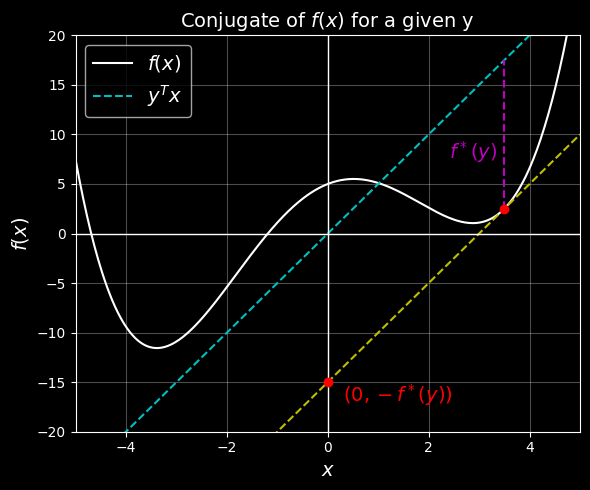

In [ ]:
def f(x):
    return 0.1 * x**4 - 2 * x**2 + 2 * x + 5

def y_dot_x(y, x):
    return y * x

x = np.linspace(-5, 5, 400)
fig_1, ax_1 = plt.subplots(figsize=(6, 5))
ax_1.plot(x, f(x), 'w-', label=r'$f(x)$')
ax_1.plot(x, y_dot_x(5, x), 'c--', label=r'$y^Tx$')
ax_1.plot(x, y_dot_x(5, x)-15, 'y--')
ax_1.scatter(0, -15, zorder=10, color='red')
ax_1.scatter(3.5, 2.5, zorder=10, color='red')
ax_1.plot([3.5,3.5], [2.5,3.5*5], 'm--')
ax_1.text(0.3, -17, r'$(0, -f^*(y))$', fontsize=14, color='r')
ax_1.text(2.4, 7.5, r'$f^*(y)$', fontsize=14, color='m')

ax_1.set_xlabel(r'$x$', fontsize=14)
ax_1.set_ylabel(r'$f(x)$', fontsize=14)
ax_1.axhline(0, color='w',linewidth=1)
ax_1.axvline(0, color='w',linewidth=1)
ax_1.set_xlim([-5, 5])
ax_1.set_ylim([-20, 20])
ax_1.grid(True, alpha=0.3)

plt.legend(fontsize=14)
plt.title(r'Conjugate of $f(x)$ for a given y', fontsize=14)
plt.tight_layout()
plt.show()

The conjugate of function $f$ is defined as

$$f^*(y) = \sup_{x\in \text{dom} f}\left(y^Tx-f(x)\right)$$

That is, for any given $y$, we move around allowable $x$ in the domain of $f$, and see what the largest value of $y^Tx-f(x)$ is

Conjugates appear often in dual problems since

$$-f^*(y)=\inf_x \left(f(x)-y^Tx\right)$$

#### $f^*$ is `convex`

$f^*$ is `convex` (supremum over affine functions of $y$), even if $f$ is not

#### $f^*$ is `closed`

A set is `closed` if it contains its boundary

* intersection of finite or infinite number of closed sets is closed
* union of finite number of closed sets is closed
* affine map of a closed set is closed

Recall the `epigraph` of a function is the set of all points lying on or above a function's graph

$$\text{epi}(f)=\{(x, t)\in \mathbf{R}^{n+1}|x\in \text{dom}(f), f(x)\leq t\}$$

and $\text{epi}(f)$ is convex if and only if $f$ is convex

For closedness, we have

A `function` $f: \mathbf{R}^n \rightarrow \mathbf{R}$ is closed if its `epigraph` is closed

Since the conjugate is the supremum of affine functions of $y$, the epigraph of the conjugate is the `intersection` of epigraphs of each affine fuction, which are all closed (as they are halfspaces)

Therefore, the epigraph of the conjugate is closed and thus, the conjugate function is `closed`

#### Fenchel's inequality

From the definition of conjugate, we have


$$f^*(y) = \sup_{z\in \text{dom} f}(y^Tz-f(z))\geq y^Tx-f(x)$$

or

$$\boxed{f(x)+f^*(y)\geq y^Tx}, \forall x, y$$

#### `Examples` of conjugate

##### Logarithm

$f(x) = -\log x$

$$\begin{align*}
f^*(y) &= \sup_{x>0}(xy+\log x) \\
& \text{for a given y, take derivative w.r.t. x and set to 0} \\
& x=-\frac{1}{y} \\
& = \left\{\begin{array}{ll} -1 - \log(-y) & y< 0 \\  \infty & \text{otherwise} \end{array}\right.
\end{align*}$$

which we can picture when we draw $f(x)=-\log x$

$$\begin{align*}f(x)=\sum x_i \log x_i &\Longrightarrow f^*(y)=\sum e^{y_i-1} \\
f(x)=-\sum \log x_i & \Longrightarrow f^*(y)=-\sum \log (-y_i) - n \\
f(X) = -\log \det X, \,X\in S^n_{++} & \Longrightarrow f^*(Y) = -\log \det (-Y)-n
\end{align*}$$

##### Quadratic

$f(x)=\frac{1}{2}x^TQx, Q\in S^n_{++}$

$$\begin{align*}
f^*(y) &= \sup_{x}(y^Tx-\frac{1}{2}x^TQx) \\
& y=Qx \rightarrow x=Q^{-1}y \\
&= \frac{1}{2} y^TQ^{-1}y
\end{align*}$$

##### Norm

Recall for any norm $\|\cdot\|$, its dual is defined as

$$\|y\|_*=\sup_{\|x\| \leq 1} y^Tx $$

or equivalently

$$\|y\|_*=\sup_{x\neq 0} \frac{y^Tx}{\|x\|}$$

From the definition, we can deduce the following

$$\|y\|_*\leq 1 \Longrightarrow \forall x, \|x\|\leq 1, y^Tx\leq \|x\| \Longrightarrow f^*(y)=\sup_x \left(y^Tx-\|x\|\right) =0$$

and

$$\|y\|_* > 1 \Longrightarrow \exists x, \|x\|\leq 1, y^Tx>1 \Longrightarrow f^*(y)=\sup_x \left(y^Tx-\|x\|\right) = +\infty$$

To see the 2nd one, we can construct a sequence with the $x$ for which $\|x\|\leq 1, y^Tx>1$, e.g.,

$$x_k=kx$$

Then, for $x_k$, we have

$$y^Tx_k-\|x_k\| = y^Tkx-k\|x\| = k(y^Tx-\|x\|)$$

and it is unbounded as $k\rightarrow +\infty$

We see that the conjugate function $f^*(y)$ behaves like the `indicator function over the unit ball of the dual norm` $C=\{y|\|y\|_*\leq 1\}$

$$f^*(y)=\sup_x \left(y^Tx-\|x\|\right)=I_C(y)=\left\{\begin{array}{ll}+\infty & y \notin C \\ 0 & y \in C\end{array}\right.$$


#### Properties of conjugate

If $f(x) \rightleftharpoons f^*(y),\, f(x_1, x_2) \rightleftharpoons f^*(y_1, y_2)$

Then
* $(af(x))^*=af^*\left(\frac{y}{a}\right)$

* $\left(af\left(\frac{x}{a}\right)\right)^*=af^*(y)$

* $f(x_1, x_2)=f_1(x_1)+f_2(x_2) \Longrightarrow f^*(y_1, y_2) = f_1^*(y_1)+f_2^*(y_2)$

Others

* $\left(f(x)+a^Tx+b\right)^*=f^*(y-a)-b$

* $\left(f(x-b)\right)^*=b^Ty+f^*(y)$

* $\left(f(Ax)\right)^*=f^*\left(A^{-T}y\right)$

#### What is the `conjugate of conjugate`?

For $f: \mathbf{R}^n\rightarrow \mathbf{R}$, we have its conjugate

$$f^*(y)=\sup_x y^Tx-f(x)$$

and the conjugate of the conjugate

$$f^{**}(x)=\sup_y x^Ty-f^*(y)$$

Since conjugate $f^*$ is convex and closed, even $f$ is not, therefore, $f^{**}$ is also `closed` and `convex`

Using `Fenchel's inequality`

$$y^Tx-f^*(y)\leq f(x), \forall x, y$$

Since $f^{**}(x)=\sup_y y^Tx-f^*(y)$, then, we have $f^{**}(x) \leq f(x), \forall x$, or equivalently

$$\text{epi} f^{**} \supseteq \text{epi}f$$

that is, $f^{**}$ represents the largest convex function that is less than or equal to $f$, also known as the `lower convex envelope` of $f$

#### $f^{**}$ when $f$ is `closed` and `convex`

If $f$ is closed and convex, then $f^{**}=f$, and $\text{epi}f^{**}=\text{epi}f$

If we can show that there does not exist any point in $\text{epi}f^{**}$ that is not in $\text{epi}f$, then we get $\text{epi}f^{**}\subseteq \text{epi}f$. Since we know $\text{epi}f^{**}\supseteq \text{epi}f$ from Fenchel's inequality, we can get $\text{epi}f^{**}=\text{epi}f$

To proceed, we assume that such point exists, which means that we can find a strict separating hyperplane between the point in $\text{epi}f^{**}$ and $\text{epi}f$, and then arrive at contradiction

##### Proof

Suppose $\exists x$  that $(x, f^{**}(x))\notin\text{epi}f$, we know that $(x, f^{**}(x)) \in \text{epi}f^{**}$ by definition

Then, there is a hyperplane that `strictly separates` the two (hyperplane separation theorem)

$$\begin{bmatrix} a \\ b\end{bmatrix}^T\begin{bmatrix} z-x \\ s-f^{**}(x)\end{bmatrix}\leq c < 0, \forall (z, s)\in\text{epi}f$$

for some $a, b, c$, where $a, b\in \mathbf{R}^n \times \mathbf{R}, c \in \mathbf{R}$ ($\geq c >0$ would be similar)

We can write this out more explicitly

$$a^Tz+bs-\left(a^Tx+b f^{**}(x)\right)\leq c < 0$$

or geometrically clearer w.r.t. strict separation

$$a^Tz+bs< a^Tx+b f^{**}(x)$$

and we want to show that no $b$ can make this inequality hold for all $(z, s)\in \text{epi}f$

If $b>0$, then as $s\rightarrow +\infty$, the left hand side becomes arbitrarily large, and this inequality will `not hold`

If $b<0$, then we can define $y=\frac{a}{-b}$ and maximize left hand side over $(z,s)\in \text{epi}f$

Recall that $s\geq f(z)$ by definition of epigraph, we have

$$\begin{align*}\left(\frac{a}{-b}\right)^Tz-s-\left(\frac{a}{-b}\right)^Tx+f^{**}(x) &\leq y^Tz-f(z)-y^Tx+f^{**}(x) \\
& \text{by definition of conjugate} \\
& \leq f^*(y)-y^Tx+f^{**}(x) \\
& \leq \frac{c}{-b}\\
& <0
\end{align*}$$

This `contradicts` Fenchel's inequality

$$ f^*(x) +f^{**}(y) \geq y^Tx, \forall x, y$$

If $b=0$, we can choose $\hat{y}\in \text{dom} f^*$ and add small perturbation $(\epsilon\hat{y}, -\epsilon)$ to $(a, b)$, with $\epsilon>0$

$$\begin{align*}\begin{bmatrix} a+\epsilon \hat{y} \\ 0-\epsilon\end{bmatrix}^T\begin{bmatrix} z-x \\ s-f^{**}(x)\end{bmatrix} &\leq c +\epsilon \left(\hat{y}^Tz-s-\hat{y}^Tx+f^{**}(x)\right)\\
& \text{by definition of conjugate and } s\geq f(z)\\
& \leq c +\epsilon \left(f^*(\hat{y})-\hat{y}^Tx+f^{**}(x)\right)\\
& f^*(\hat{y})-\hat{y}^Tx+f^{**}(x)\geq 0 \text{ due to Fenchel's inequality} \\
& \text{Therefore, we can always find small enough } \epsilon \text{ to make the following happen} \\
&< 0
\end{align*}$$

This `reduces` the scenario to the one with
* $\tilde{a} \leftarrow a+\epsilon \hat{y}$
* $\tilde{b}\leftarrow -\epsilon, \tilde{b}<0$
* $\tilde{c}\leftarrow c +\epsilon \left(f^*(\hat{y})-\hat{y}^Tx+f^{**}(x)\right)$

$$\begin{bmatrix} \tilde{a} \\ \tilde{b}\end{bmatrix}^T\begin{bmatrix} z-x \\ s-f^{**}(x)\end{bmatrix}\leq \tilde{c} < 0, \forall (z, s)\in\text{epi}f$$

and we can use the same argument for $b<0$ to arrive at contradiction

#### Conjugate and `subdifferential`

Recall that for nondifferentiable `convex` function $f: \mathbf{R}^n \rightarrow \mathbf{R}$

$x$ is a minimizer of $f$ if $0 \in \partial f(x)$

Now, if we have, for some $x$ and $y$, the following

$$y \in \partial f(x)$$

where $f$ is `convex and closed`, then

$$0\in y-\partial f(x)$$

Therefore, $x$ is a maximizer of $y^Tu-f(u)$

This indicates that $$f^*(y)=\sup_u (y^Tu-f(u)) =y^Tx-f(x)$$

which is when the `equality holds` for Fenchel's inequality

For the conjugate evaluated at another point $v$

$$\begin{align*}
f^*(v)&=\sup_u (v^Tu-f(u)) \\
& \text{by definition of supremum} \\
&\geq v^Tx-f(x) \\
&=x^Tv-f(x)-x^Ty+y^Tx \\
& = y^Tx-f(x) +x^T(v-y)\\
&=f^*(y)+x^T(v-y)
\end{align*}$$

Since this holds for all $v$ and $f^*$ is convex, we have $x\in\partial f^*(y)$ (This inequality resembles the first-order condition for convexity, which suggests that $x$ acts as a subgradient of $f^*$ at $y$)

Similarly, $x\in\partial f^*(y) \Longrightarrow y\in \partial f(x)$ follows from $f^{**}=f$, since $f$ is `convex and closed`

Therefore, we have

$$ \boxed{y\in \partial f(x) \Longleftrightarrow x\in\partial f^*(y) \Longleftrightarrow f^*(y)+f(x)=y^Tx\Longleftrightarrow x\in \arg\min_u f(u)-y^Tu}$$

#### `Strong convexity` and gradient of conjugate

If $f$ is `strongly convex`, then it has a `unique` minimizer (intuitively, the quadratic lower bound "prevents" it from having flat region)

Therefore, $y^Tu-f(u)$ has a `unique` maximizer $x$ for every $y$

If $f$ is also closed, then

$$x=\arg \max_u \, y^Tu-f(u) \Longleftrightarrow y\in \partial f(x) \Longleftrightarrow x\in \partial f^*(y)$$

Since $x$ is unique, therefore

$$x\in \partial f^*(y)=\{\nabla f^*(y)\}$$

hence $f^*$ is `differentiable` and

$$\nabla f^*(y)=\arg \max_u \, y^Tu-f(u)$$

#### Conjugate of `strongly convex` $f$ is smooth

Recall for $\alpha$-strongly convex function $f$

$$f(y)  \geq f(x)+\langle \nabla f(x), y-x \rangle+ \frac{\alpha}{2}\|y-x\|^2$$

If we take $y_1\in \partial f(x_1)$ and $y_2\in \partial f(x_2)$, we have

(Proof for subgradient rather than gradient, see 5.18 of https://www.seas.ucla.edu/~vandenbe/236C/lectures/conj.pdf)

$$\begin{align*}
f(x_1)&\geq f(x_2)+y_2^T(x_1-x_2)+\frac{\alpha}{2}\|x_1-x_2\|^2 \\
f(x_2)&\geq f(x_1)+y_1^T(x_2-x_1)+\frac{\alpha}{2}\|x_1-x_2\|^2
\end{align*}$$

Rearrange, and use `Hölder's inequality`

$$u^Tv\leq \|u\|_*\|v\|$$

we get

$$\alpha\|x_1-x_2\|^2\leq \langle y_1-y_2, x_1-x_2\rangle \leq \|y_1-y_2\|_*\|x_1-x_2\|$$

or

$$\alpha\|x_1-x_2\| \leq \|y_1-y_2\|_*$$

Since $y_1\in \partial f(x_1) \rightarrow x_1 = \nabla f^*(y_1)$ and $y_2\in \partial f(x_2) \rightarrow x_2 = \nabla f^*(y_2) $, we have

$$\| \nabla f^*(y_1)- \nabla f^*(y_2)\|\leq \frac{1}{\alpha} \|y_1-y_2\|_*$$

Therefore

$f^*$ is $\frac{1}{\alpha}$-`smooth` when $f$ is $\alpha$-`strongly convex`

#### Conjugate of `smooth convex` $f$ is strongly convex

If $f$ is $\beta$-`smooth` and convex, then by `co-coercivity`, we have

$$\langle \nabla f(x_1) - \nabla f(x_2), x_1-x_2 \rangle \geq \frac{1}{\beta}\|\nabla f(x_1)-\nabla f(x_2)\|^2$$

If we let $x_1\in \partial f^*(y_1)$ and $x_2\in \partial f^*(y_2)$, since $f$ is differentiable, we have $y_1=\nabla f(x_1)$ and $y_2=\nabla f(x_2)$

Plug in

$$\langle y_1-y_2, x_1-x_2 \rangle \geq \frac{1}{\beta}\|y_1-y_2\|^2$$

Now, let

$$h(y) = f^*(y)-\frac{1}{2\beta}\|y\|^2$$

and we have

$$\partial h(y) = \partial f^*(y)-\frac{1}{\beta}y = x-\frac{1}{\beta}y$$


We then check

$$\begin{align*}\langle \partial h(y_1)-\partial h(y_2), y_1-y_2 \rangle &= \langle (x_1-x_2)-\frac{1}{\beta}(y_1-y_2), y_1-y_2\rangle \\
&=\langle x_1-x_2, y_1-y_2\rangle -\frac{1}{\beta}\|y_1-y_2\|^2 \\
& \text{use the result from co-coercivity} \\
&\geq 0
\end{align*}$$

Therefore, $\partial h(y)$ is monotone $\Longrightarrow$ $h(y)$ is convex $\Longrightarrow$ $f^*(y)$ is $\frac{1}{\beta}$-`strongly convex`

#### Moreau decomposition

Recall, for a convex function $f$, the prox operator is defined as for a given $x$, find the $u$ that minimizes $f(u)$ while not being too far away from $x$

$$u=\text{prox}_f(x) = \arg \min_u \, f(u)+\frac{1}{2}\|u-x\|^2\, (t=1)$$

Therefore

$$\begin{align*}
0\in\partial f(u) + u-x &\Longleftrightarrow x-u \in \partial f(u) \\
&\Longleftrightarrow u\in \partial f^*(x-u) \\
&\Longleftrightarrow 0\in \partial f^*(x-u) + (x - u) - x \\
& \Longleftrightarrow x-u=\text{prox}_{f^*}(x)
\end{align*}$$

and we have the `Moreau decomposition`

$$\boxed{x=\text{prox}_f(x)+\text{prox}_{f^*}(x)}$$

#### Dual (sub)gradient method

From previous description, we know that for optimization problem

$$\begin{align*}
\min\,\,\, & f(x) \\
\text{s.t. }\,\,\, & Ax\leq b \\
& Cx=d
\end{align*}$$

we can rearrange the Lagrangian as

$$\begin{align*}
&\inf_{x\in D}\left(f(x) - (-A^T\lambda - C^T \nu)^Tx\right)-b^T\lambda-d^T\nu \\
&=-\sup_{x\in D}\left( (-A^T\lambda - C^T \nu)^Tx-f(x) \right)-b^T\lambda-d^T\nu \\
& = -f^*(-A^T\lambda - C^T \nu)-b^T\lambda - d^T\nu
\end{align*}$$

Therefore, the dual problem is

$$\max_{\lambda, \nu} -f^*(-A^T\lambda - C^T \nu)-b^T\lambda - d^T\nu, \, \text{s.t. } \lambda \geq 0$$

##### Equality-constrained problem

To see how the properties of conjugate work, we consider an `equality-constrained` problem

$$\begin{align*}
\min\,\,\, & f(x) \\
\text{s.t. }\,\,\, & Ax= b \\
\end{align*}$$

and we have the dual

$$\max_{\nu} -f^*(-A^T\nu)-b^T\nu$$

Define $g(\nu)=-f^*(-A^T\nu)-b^T\nu$ and use chain rule, we have

$$\partial g(\nu)=A\partial f^*(-A^T\nu)-b$$

Now, we can apply

$$ x\in \partial f^*(y) \Longleftrightarrow x\in \arg\min_u f(u)-y^Tu$$

Let $y=-A^T\nu$, we have

$$ x\in \partial f^*(-A^T\nu) \Longleftrightarrow x\in \arg\min_u f(u)+\nu^T A u$$

Plug into the expression of $\partial g(\nu)$, we have

$$\partial g(\nu)=Ax-b$$

##### Dual subgradient method

Now, we can do `dual subgradient method` by starting with some initial $\nu^0$ and repeat

$$\begin{align*}
x^{k+1} &\in \arg \min_u f(u)+\left(\nu^k\right)^TAu \\
\nu^{k+1} &= \nu^k+t_k(Ax^{k+1}-b)
\end{align*}$$

For dual gradient ascent, just replace $\in$ with $=$

#### Convergence

If $f$ is closed and convex, then

$f$ is strongly convex with parameter $m$ $\Longleftrightarrow$ $\nabla f^*$ is Lipschitz with parameter $1/m$

Combine this with the convergence results of gradient descent we have previously

* If $f$ is strongly convex with $m$ (meaning $\nabla f^*$ is Lipschitz), then dual gradient ascent with step size $t_k=m$ converges $\sim \frac{1}{\epsilon}$
  * Recall if $\nabla f$ is Lipschitz, gradient descent converges $\sim \frac{1}{\epsilon}$
* If $f$ is strongly convex with $m$, and $\nabla f$ is Lipschitz with $L$ (meaning these two properties also apply to $f^*$), then dual gradient ascent with step size $t_k=\frac{2}{1/m+1/L}$ converges $\sim \log\frac{1}{\epsilon}$
  * Recall if $f$ is both strongly convex and smooth (that is, its gradient is Lipschitz), gradient descent converges $\sim \log\frac{1}{\epsilon}$